In [4]:
# import library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [5]:
# Create DataFrame
data = pd.read_csv('train.csv')

In [7]:
# Display the first 5 rows of the DataFrame
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
# understand the shape of the data
data.shape

(891, 12)

In [9]:
# understand the type of data
data.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [40]:
# understand the data
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [41]:
# look for missing values
data.isnullsum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Figure size 2000x2000 with 0 Axes>

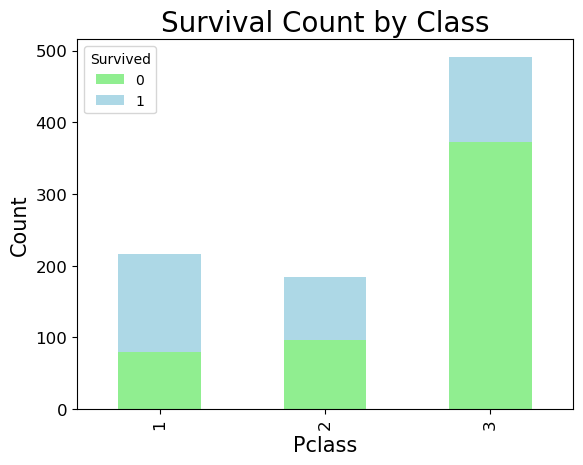

In [42]:
# Create a pivot table of survival rate by class
survival_pivot = data.pivot_table(index='Pclass',
                    columns='Survived'
                    values='PassengerId')

# Plot the pivot table
plt.figure(figsize=(20, 20)
survival_pivot.plot(kind='bar',
                    stacked=True, # what happens if you make this False?
                    color=['lightgreen', 'lightblue'])

plt.title('Survival Count by Class', fontsize=20)
plt.xlabel('Pclass', fontsize=15)
plt.ylabel('Count' fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

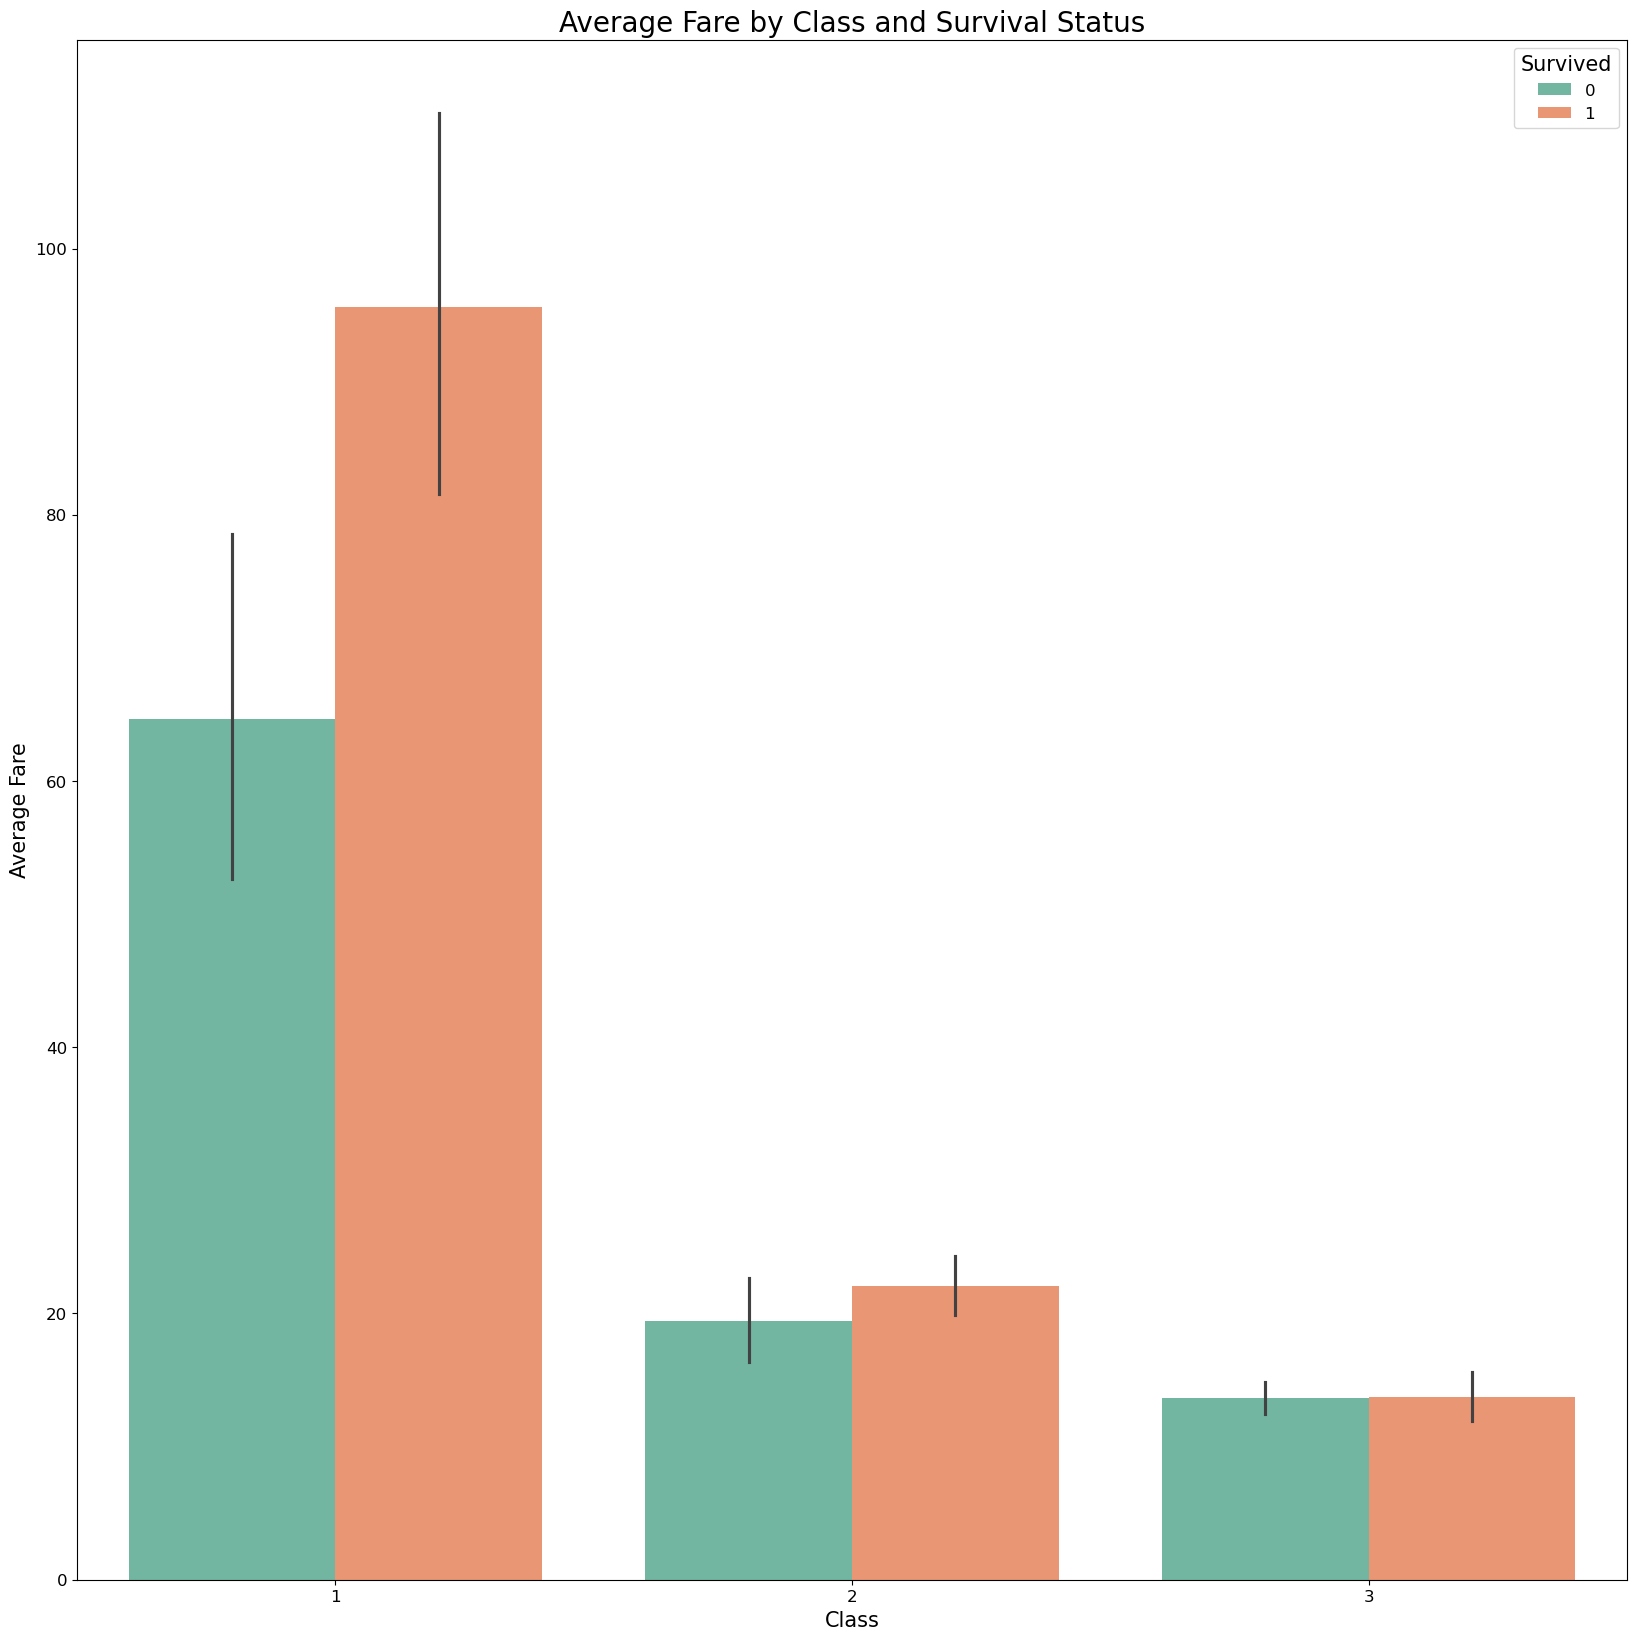

In [43]:
# Plot a bar plot showing the average fare paid by passengers in each class, differentiated by survival status
plt.figure(figsize=(20, 20))
sns.barplot(x='Pclass',
            y='Fare',
            hue='Survived',
            data==data,
            palette='Set2')

plt.title('Average Fare by Class and Survival Status', fontsize=20)
plt.xlabel('Class', fontsize=15)
plt.ylabel('Average Fare', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Survived', fontsize=12, title_fontsize=15)

<Axes: xlabel='Age', ylabel='Count'>

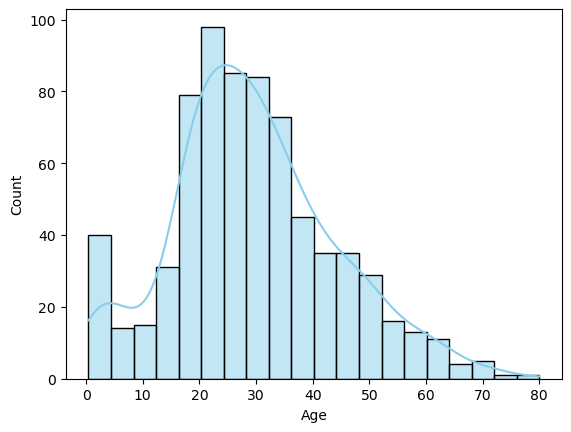

In [44]:
# Plot a histogram of passenger ages
sns.histplot(data['Age'], # what is the dropna doing?
             kde=True # adds a kernel density estimate to the plot
             color='skyblue')

In [46]:
# Populating null Age values with the average age by sex, Pclass, and Survived
data['Age'] = data.groupby(['Sex' 'Pclass'],group_keys=False)['Age'].apply(lambda x: x.fillna(x.mean()))

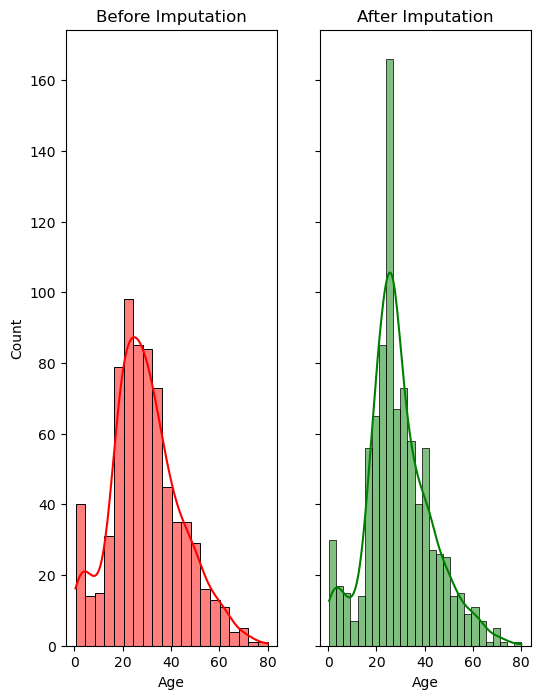

In [47]:
# Plot before and after imputation
fig, axes = plt.subplots(1, 2, figsize=(, 8), sharey=True)
sns.histplot(data_original['Age'], ax=axes[0], kde=True, color='red').set_title('Before Imputation')
sns.histplot(data['Age'], kde=True, ax=axes[0], color='green').set_title('After Imputation')
plt.show()

In [48]:
# Convert categorical variables into dummy/indicator variables
data = pd.get_dummies( columns=['Sex', 'Embarked'], drop_first=True)

In [49]:
# Define features we will use for the model
X = data[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S']]

# define the target variable 
y = data['survived']

In [50]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [51]:
# Train the logistic regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [54]:
# Evaluate the model using accuracy and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')

Accuracy: 0.8555555555555555
Confusion Matrix:
[[46  8]
 [ 5 31]]


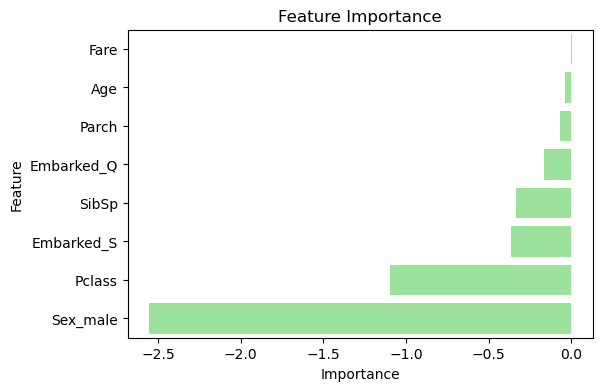

In [56]:
# Calculate feature importance
feature_importance = model.coef_[0]

# Create a DataFrame to display feature importance
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(600, 4))
sns.barplot(x='Importance', data=importance_df, color = 'lightgreen')
plt.title('Feature Importance')
plt.show()

In [57]:
# Import new test data
test_data = pd.read_csv('test.csv')

In [58]:
# Populating null Age values with the average age by sex, Pclass, and Survived
test_data['Age'] = test_data.groupby(['Sex', 'Pclass'],group_keys=False)['Age'].apply(lambda x: x.fillna(x.mean()))

In [59]:
# check for null values 
test_data.isnull().sum

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [61]:
# Preprocess the test data in the same way as the training data
test_data = pd.get_dummies(test_data, drop_first=True)

In [62]:
# Ensure the test data has the same columns as the training data
test_data = test_data.reindex(columns=X.columns, fill_value="zero")

In [63]:
# Predict on the new test data
test_predictions = model.predict(test_data)

In [64]:
# adding the survived field back to the test data
test_data['Survived_predicated'] = test_predictions